# GLOBAL WARMING PREDICTION



##        WHAT IS GLOBAL WARMING?

Global warming is the current increase in temperature of the earth’s surface (both land and water) as well as it's atmosphere.

In the past, when the Earth experienced increases in temperature it  was the result of natural causes but today it is being caused by the accumulation of greenhouse gases in the atmosphere produced by human activities.

We have used regression method to predict the global warming temperatures from 2016-2030 and suggest some preventive measures to curb global warming.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
import mpl_toolkits.basemap as bm
warnings.filterwarnings('ignore')


global_temp = pd.read_csv("../EVS/a.csv")

#Extract the year from a date
years = global_temp['year'].tolist()
co2 =[]
ch4 =[]
n2o =[]
cfc12=[]
cfc11=[]

for year in years:
    co2.append(global_temp[global_temp['year'].apply(
        lambda x: x) == year]['co2'].mean())
    ch4.append(global_temp[global_temp['year'].apply(
        lambda x: x) == year]['ch4'].mean())
    n2o.append(global_temp[global_temp['year'].apply(
        lambda x: x) == year]['n2o'].mean())
    cfc11.append(global_temp[global_temp['year'].apply(
        lambda x: x) == year]['cfc11'].mean())
    cfc12.append(global_temp[global_temp['year'].apply(
        lambda x: x) == year]['cfc12'].mean())
   

trace0 = go.Scatter(
    x = years, 
    y = np.array(co2),
    fill= None,
    mode='lines',
    name='CO2 Emission',
    line=dict(
        color='rgb(10, 155, 155)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(ch4),
    fill=None,
    mode='lines',
    name='CH4 Emission',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = np.array(n2o),
    name='NO2 Emission',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
trace3 = go.Scatter(
    x = years, 
    y = np.array(cfc11),
    fill= None,
    mode='lines',
    name='CFC11 Emission',
    line=dict(
        color='rgb(100, 155, 155)',
    )
)
trace4 = go.Scatter(
    x = years, 
    y = np.array(cfc12),
    fill= None,
    mode='lines',
    name='CFC12 Emission',
    line=dict(
        color='rgb(200, 15, 15)',
    )
)
data = [trace0, trace1, trace2,trace3,trace4]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Emission(AAU)'),
    title='Greenhouse Gases Emission',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


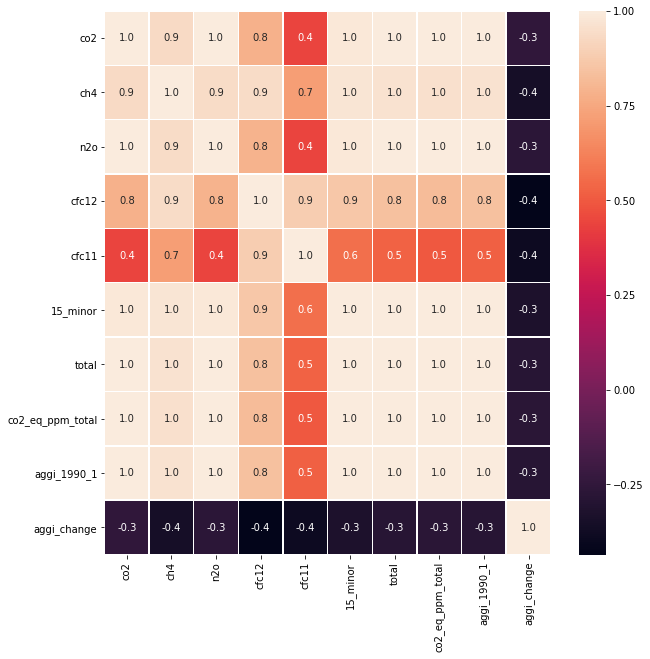

In [4]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(global_temp.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [4]:
global_temp = pd.read_csv("../EVS/GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    unl = global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty']
    mean_temp_world_uncertainty.append(unl.apply(lambda x: x ** 2).sum() / len(unl) ** 2)
                        

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(10, 155, 155)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


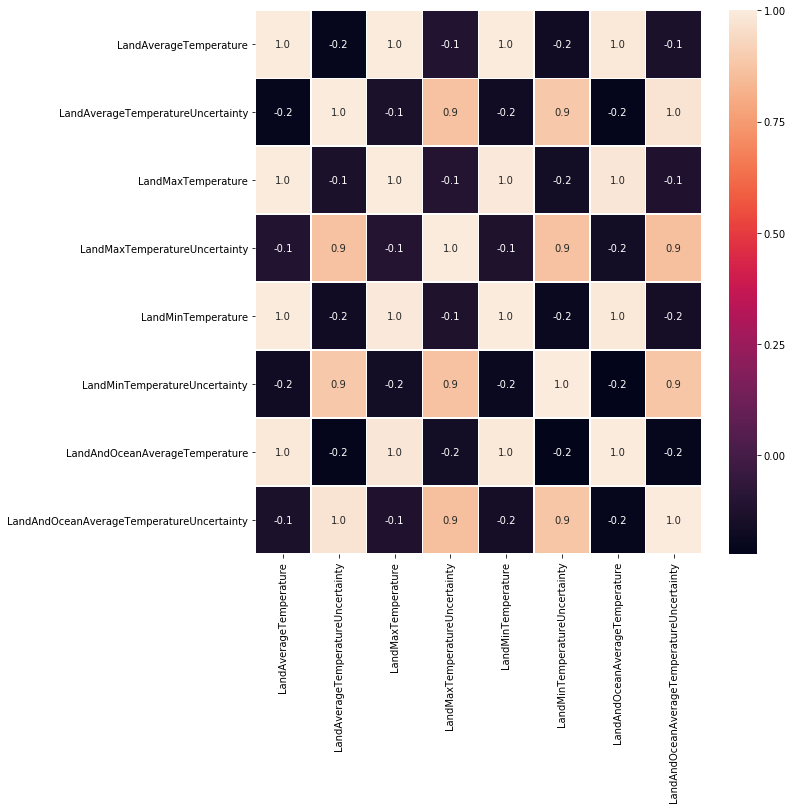

In [10]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(global_temp.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [5]:
globaltemp = pd.read_csv('../EVS/GlobalLandTemperaturesByCountry.csv',parse_dates=['dt'])
globaltemp.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [6]:
globaltemp[[ 'Country']].drop_duplicates()
globaltemp.head()
globaltemp['Country']=globaltemp['Country'].astype(str)

countrytemp=globaltemp[globaltemp.dt.dt.year>=1979]
countrytemp.info()
countrytemp.head()
countrylist=countrytemp['Country'].tolist()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101331 entries, 2822 to 577461
Data columns (total 4 columns):
dt                               101331 non-null datetime64[ns]
AverageTemperature               100693 non-null float64
AverageTemperatureUncertainty    101109 non-null float64
Country                          101331 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.9+ MB


In [7]:
city_means = countrytemp.groupby(['Country', countrytemp.dt.dt.year])['AverageTemperature'].mean().unstack()
city_mins = countrytemp.groupby(['Country', countrytemp.dt.dt.year])['AverageTemperature'].min().unstack()
city_maxs = countrytemp.groupby(['Country', countrytemp.dt.dt.year])['AverageTemperature'].max().unstack()
city_means.head()

dt,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14.262083,14.887333,14.860083,13.733083,14.614833,14.245833,14.888750,14.223167,14.984000,15.389000,...,15.770917,14.980000,15.595583,15.106167,15.216500,15.257750,15.828667,15.518000,14.481583,16.533625
Africa,24.498417,24.446667,24.297417,24.211583,24.579417,24.387167,24.339833,24.309417,24.922000,24.568333,...,24.895917,25.156167,24.818917,24.851500,24.754667,25.026500,25.472500,24.786500,24.725917,25.208750
Albania,12.989167,12.162083,12.578667,13.015250,12.510917,12.640750,12.948167,13.056417,12.996583,13.044083,...,13.258167,12.747083,12.976917,13.890500,13.955167,13.844250,13.775417,13.443250,13.768250,14.993875
Algeria,23.396833,23.160167,23.579250,23.094167,23.683000,23.063083,23.526250,23.256667,24.247750,23.815667,...,23.916000,24.222583,24.200833,24.065333,23.950250,24.154333,25.215667,24.144167,23.954833,25.121500
American Samoa,26.891333,26.990750,26.745500,26.902750,26.928667,26.879500,26.949917,26.980333,26.898750,27.089417,...,27.281167,27.373500,27.081250,27.452417,26.995083,27.034250,27.453417,27.009500,27.201417,27.517250


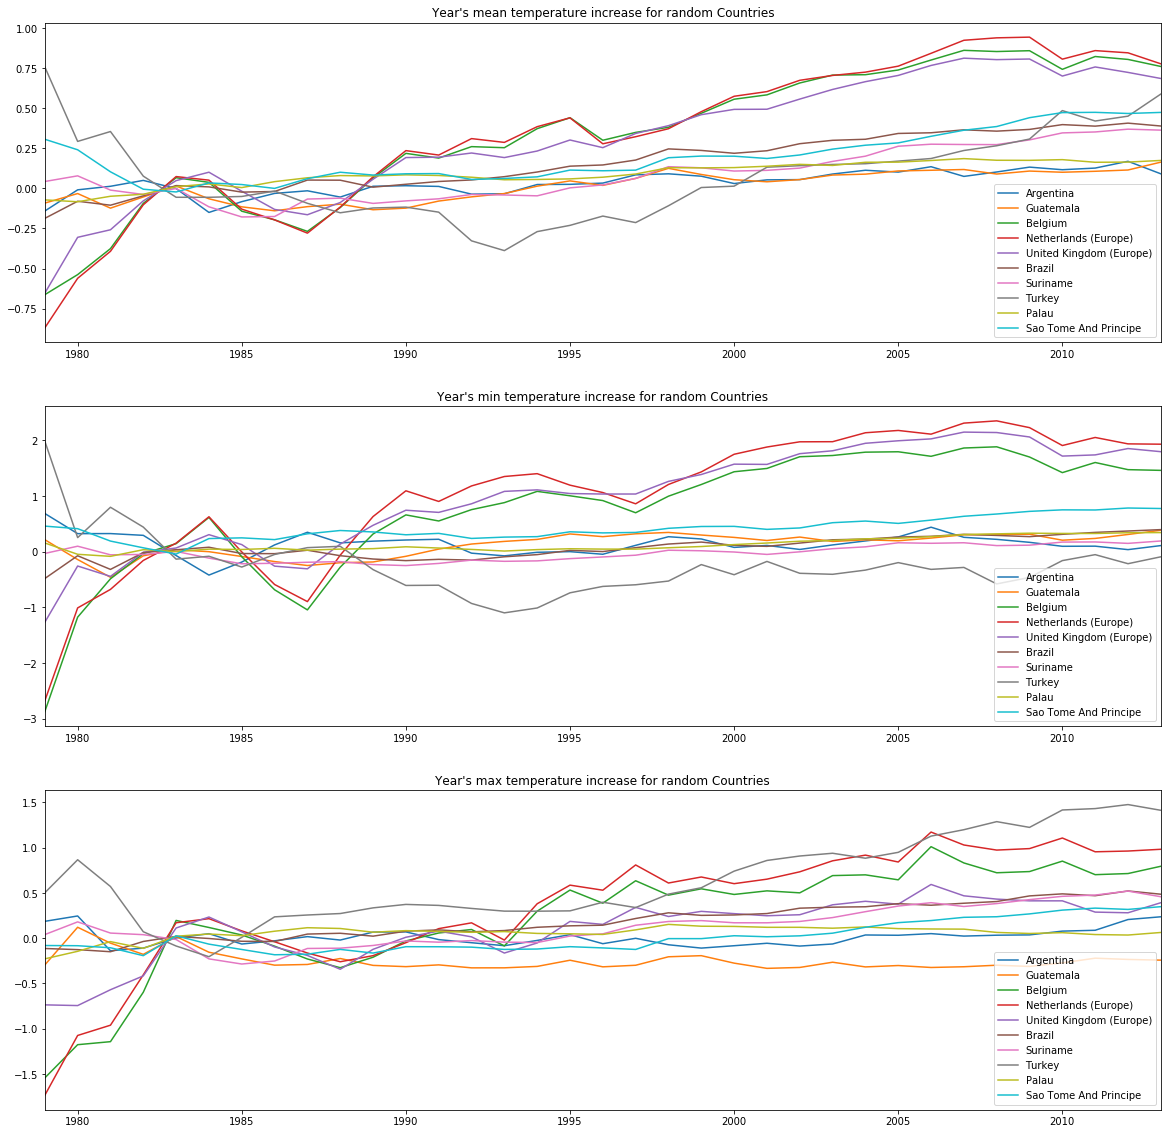

In [9]:
first_years_mean = city_means.iloc[:, :5].mean(axis=1) # mean temperature for the first 5 years
city_means_shifted = city_means.subtract(first_years_mean, axis=0)

def plot_temps(cities, city_ser, ax):
    first_years_mean = city_ser.iloc[:, :5].mean(axis=1)
    city_ser = city_ser.subtract(first_years_mean, axis=0)
    for city in random_cities:
        row = city_ser.loc[city]
        pd.stats.moments.ewma(row, 10).plot(label=row.name, ax=ax)
    ax.set_xlabel('')
    ax.legend(loc='best')

fig, axes = plt.subplots(3,1, figsize=(20,20))

n = 10
random_cities = city_means_shifted.sample(n).index

plot_temps(random_cities, city_means, axes[0])
plot_temps(random_cities, city_mins, axes[1])
plot_temps(random_cities, city_maxs, axes[2])


axes[0].set_title("Year's mean temperature increase for random Countries")
axes[1].set_title("Year's min temperature increase for random Countries")
axes[2].set_title("Year's max temperature increase for random Countries")
plt.show()

## Datasets
1.Berkley 

2.Info_knowledge

# # Research Paper
Forecasting the Future: Air Quality with the IoT by Tapiwa Chiwewe who is based at IBM’s lab in Johannesburg.

In [8]:
df = pd.read_csv('bgt.csv',parse_dates = ['dt'])
df1 = pd.read_csv('a.csv',parse_dates=['year'])

#change dt to datetime series
df['year'] = pd.DatetimeIndex(df['dt']).year
dt = df['dt']
df.drop(['dt'],inplace=True,axis=1)
df1.drop([37],inplace=True)

#changing into int 
df['year'] = df['year'].apply(int)
df1['year'] = df1['year'].apply(int)

#merging two dataframes
df3 = df.merge(df1,on = 'year',how='left')
#setting index of df3
df3.set_index(['year'],inplace=True)
#-------------------------------------------------------------

air = df3[['landaveragetemperature','landmaxtemperature','landmintemperature','co2','ch4','n2o','cfc12','cfc11','15_minor','co2_eq_ppm_total','aggi_1990_1']]
air.set_index(dt,inplace=True)
air = air.resample('AS').mean()
air_dependent = air.iloc[:,0].values
#-------------------------------------------------------------
feat = air[['co2','ch4','n2o','cfc12','cfc11','15_minor','co2_eq_ppm_total','aggi_1990_1']]
feat['year'] = feat.index
feat['year'] = pd.DatetimeIndex(feat['year']).year
#-------------------------------------------------------------
X = feat.iloc[:,8].values
y = feat.iloc[:,:-1].values

fut_date = np.array([2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040])
fut_date = fut_date.reshape(-1,1)
"""
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
"""
X = X.reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
fut_values = reg.predict(fut_date)

#-------------------------------------------------------------
current_inde = feat.iloc[:,:-1].values
current_dep = air.iloc[:,0].values
from sklearn.linear_model import LinearRegression   
reg = LinearRegression()
reg.fit(current_inde,current_dep)
ans = fut_temp = reg.predict(fut_values)
print(ans)



[  9.7527795    9.77949241   9.80620532   9.83291822   9.85963113
   9.88634404   9.91305695   9.93976986   9.96648277   9.99319568
  10.01990859  10.04662149  10.0733344   10.10004731  10.12676022
  10.15347313  10.18018604  10.20689895  10.23361186  10.26032476
  10.28703767  10.31375058  10.34046349  10.3671764   10.39388931]


# ‘We’ are responsible!

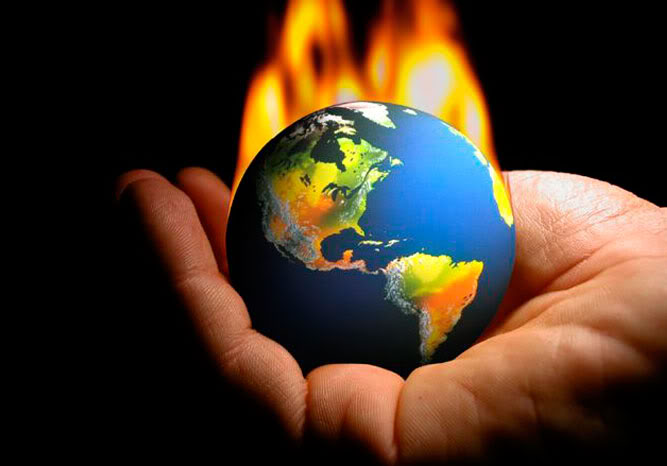

In [9]:
from IPython.display import display, Markdown
display(Markdown("# ‘We’ are responsible!"))
from IPython.display import Image
Image(filename="global-warming.jpg")

## PREVENTIVE MEASURES

Plant maximum number of trees as they releases oxygen and absorbs CO2    present in atmosphere. In this way a tree balance the temperature of air and   reduces the amount of CO2 present in air. 


Vehicles release many harmful gases in the air. Hence try to drive those cars which run on gas or electricity or carpool. 


Use fans more than air conditioners to use less energy. Hot air releases from air conditioner is one of the major factor behind global warming.


Saving water reduces carbon pollution, too. That's because it takes a lot of energy to pump, heat, and treat your water.

Replace your light bulbs! Using CFL light bulbs uses 60% less energy than old fashioned light bulbs-which in turn reduces your contribution of three hundred pounds of carbon dioxide per year. Simply changing your light bulbs in the house can create a lasting impression.